In [63]:
# adaboost is an algorithm which inreases the weight of previously misclassified records.
# ensemble learning
# distance based models won't run in this
# only random sampling based models will work in this

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [39]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report

In [40]:
df = pd.read_csv('/content/Social_Network_Ads.csv')

x = df.drop('Purchased',axis=1).values
y = df['Purchased'].values

sc = StandardScaler()
xsc = sc.fit_transform(x)

xtrain,xtest,ytrain,ytest = train_test_split(xsc,y,test_size=0.2,random_state=42)



In [41]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
# from sklearn.neighbors import KNeighborsClassifier
# KNN doesn't work because it does not increase weights of misclassified records.


In [59]:
est = DecisionTreeClassifier(max_depth=2)
adamodel = AdaBoostClassifier(estimator=est,n_estimators=1)
# n_estimators=1 getting 1 weak learners (decision trees)
adamodel.fit(xtrain,ytrain).score(xtest,ytest)

0.9473684210526315

In [60]:
yhat = adamodel.predict(xtest)
print(classification_report(ytest,yhat))

              precision    recall  f1-score   support

           0       1.00      0.91      0.95        32
           1       0.89      1.00      0.94        25

    accuracy                           0.95        57
   macro avg       0.95      0.95      0.95        57
weighted avg       0.95      0.95      0.95        57



(75, 89) (75, 89)


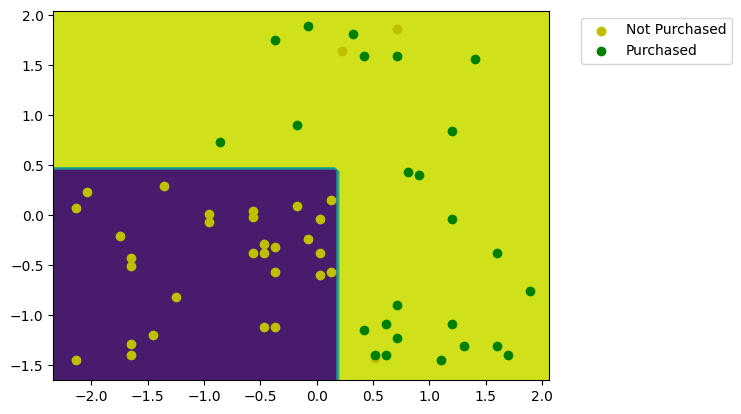

In [61]:
age = np.arange(np.min(xtest[:,0])-0.2, np.max(xtest[:,0])+0.2, 0.05)
salary = np.arange(np.min(xtest[:,1])-0.2, np.max(xtest[:,1])+0.2, 0.05)

# here -0.2 and +0.2 is just for padding so our plot's curves do not touch the axes.

AGE,SAL = np.meshgrid(age,salary)
print(AGE.shape, SAL.shape)

# In X rows values' are same
# In Y column values' are same

feature1 = AGE.ravel()
feature2 = SAL.ravel()

test_vals = np.c_[feature1,feature2]
test_vals.shape

# concatenate as per model's need and reshape to 2D shape so that contour can be plot
# get predicted answers
pred_ans = adamodel.predict(test_vals).reshape(AGE.shape)
pred_ans.shape

plt.contourf(AGE,SAL,pred_ans)

plt.scatter(xtest[ytest==0,0],xtest[ytest==0,1], c='y',label='Not Purchased')
plt.scatter(xtest[ytest==1,0],xtest[ytest==1,1], c='g',label='Purchased')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)

# Checking with other models

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00        32
           1       0.44      1.00      0.61        25

    accuracy                           0.44        57
   macro avg       0.22      0.50      0.30        57
weighted avg       0.19      0.44      0.27        57

(75, 89) (75, 89)


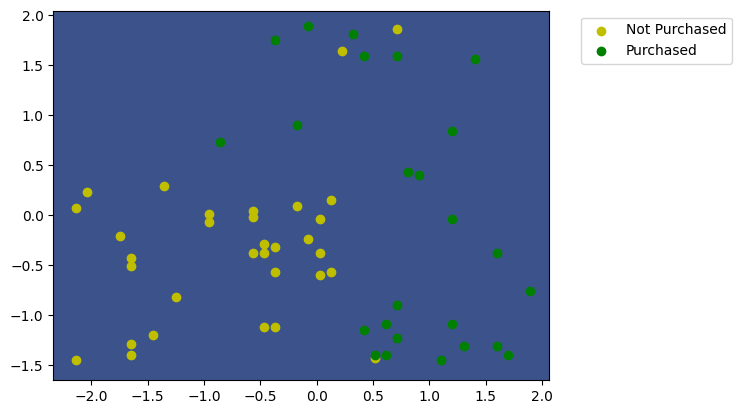

In [65]:

svc = SVC() # default kernel rdf
adamodel = AdaBoostClassifier(estimator=svc,n_estimators=1)
# n_estimators=1 getting 1 weak learners (decision trees)
adamodel.fit(xtrain,ytrain).score(xtest,ytest)

yhat = adamodel.predict(xtest)
print(classification_report(ytest,yhat))


age = np.arange(np.min(xtest[:,0])-0.2, np.max(xtest[:,0])+0.2, 0.05)
salary = np.arange(np.min(xtest[:,1])-0.2, np.max(xtest[:,1])+0.2, 0.05)

# here -0.2 and +0.2 is just for padding so our plot's curves do not touch the axes.

AGE,SAL = np.meshgrid(age,salary)
print(AGE.shape, SAL.shape)

# In X rows values' are same
# In Y column values' are same

feature1 = AGE.ravel()
feature2 = SAL.ravel()

test_vals = np.c_[feature1,feature2]
test_vals.shape

# concatenate as per model's need and reshape to 2D shape so that contour can be plot
# get predicted answers
pred_ans = adamodel.predict(test_vals).reshape(AGE.shape)
pred_ans.shape

plt.contourf(AGE,SAL,pred_ans)

plt.scatter(xtest[ytest==0,0],xtest[ytest==0,1], c='y',label='Not Purchased')
plt.scatter(xtest[ytest==1,0],xtest[ytest==1,1], c='g',label='Purchased')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)

              precision    recall  f1-score   support

           0       0.87      0.84      0.86        32
           1       0.81      0.84      0.82        25

    accuracy                           0.84        57
   macro avg       0.84      0.84      0.84        57
weighted avg       0.84      0.84      0.84        57

(75, 89) (75, 89)


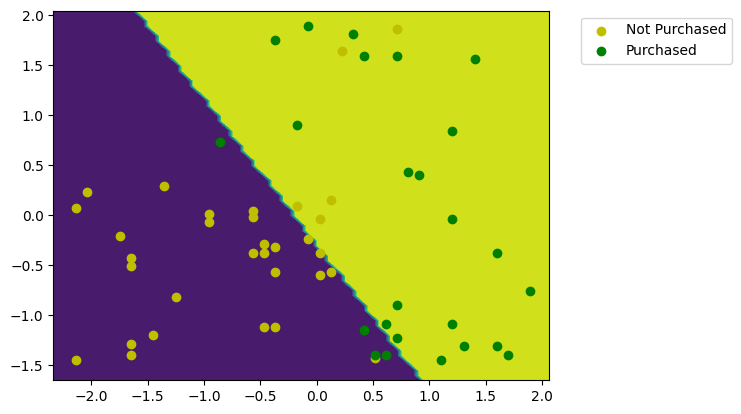

In [66]:

svc = SVC(kernel='linear') # default kernel rdf
adamodel = AdaBoostClassifier(estimator=svc,n_estimators=1)
# n_estimators=1 getting 1 weak learners (decision trees)
adamodel.fit(xtrain,ytrain).score(xtest,ytest)

yhat = adamodel.predict(xtest)
print(classification_report(ytest,yhat))


age = np.arange(np.min(xtest[:,0])-0.2, np.max(xtest[:,0])+0.2, 0.05)
salary = np.arange(np.min(xtest[:,1])-0.2, np.max(xtest[:,1])+0.2, 0.05)

# here -0.2 and +0.2 is just for padding so our plot's curves do not touch the axes.

AGE,SAL = np.meshgrid(age,salary)
print(AGE.shape, SAL.shape)

# In X rows values' are same
# In Y column values' are same

feature1 = AGE.ravel()
feature2 = SAL.ravel()

test_vals = np.c_[feature1,feature2]
test_vals.shape

# concatenate as per model's need and reshape to 2D shape so that contour can be plot
# get predicted answers
pred_ans = adamodel.predict(test_vals).reshape(AGE.shape)
pred_ans.shape

plt.contourf(AGE,SAL,pred_ans)

plt.scatter(xtest[ytest==0,0],xtest[ytest==0,1], c='y',label='Not Purchased')
plt.scatter(xtest[ytest==1,0],xtest[ytest==1,1], c='g',label='Purchased')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        32
           1       0.44      1.00      0.61        25

    accuracy                           0.44        57
   macro avg       0.22      0.50      0.30        57
weighted avg       0.19      0.44      0.27        57

(75, 89) (75, 89)


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


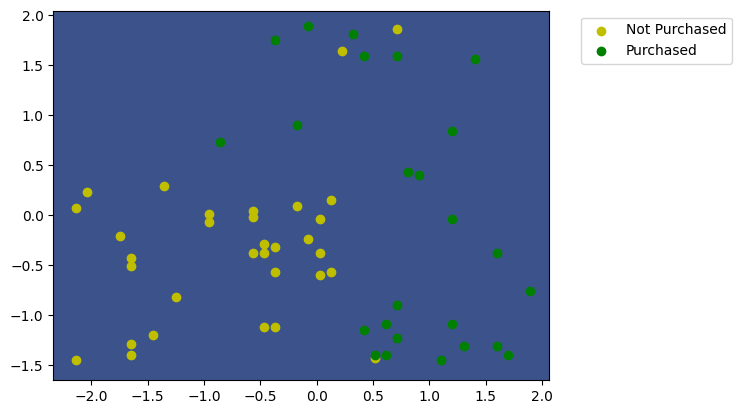

In [67]:

svc = SVC(kernel='sigmoid') # default kernel rdf
adamodel = AdaBoostClassifier(estimator=svc,n_estimators=1)
# n_estimators=1 getting 1 weak learners (decision trees)
adamodel.fit(xtrain,ytrain).score(xtest,ytest)

yhat = adamodel.predict(xtest)
print(classification_report(ytest,yhat))


age = np.arange(np.min(xtest[:,0])-0.2, np.max(xtest[:,0])+0.2, 0.05)
salary = np.arange(np.min(xtest[:,1])-0.2, np.max(xtest[:,1])+0.2, 0.05)

# here -0.2 and +0.2 is just for padding so our plot's curves do not touch the axes.

AGE,SAL = np.meshgrid(age,salary)
print(AGE.shape, SAL.shape)

# In X rows values' are same
# In Y column values' are same

feature1 = AGE.ravel()
feature2 = SAL.ravel()

test_vals = np.c_[feature1,feature2]
test_vals.shape

# concatenate as per model's need and reshape to 2D shape so that contour can be plot
# get predicted answers
pred_ans = adamodel.predict(test_vals).reshape(AGE.shape)
pred_ans.shape

plt.contourf(AGE,SAL,pred_ans)

plt.scatter(xtest[ytest==0,0],xtest[ytest==0,1], c='y',label='Not Purchased')
plt.scatter(xtest[ytest==1,0],xtest[ytest==1,1], c='g',label='Purchased')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)

              precision    recall  f1-score   support

           0       0.94      0.91      0.92        32
           1       0.88      0.92      0.90        25

    accuracy                           0.91        57
   macro avg       0.91      0.91      0.91        57
weighted avg       0.91      0.91      0.91        57

(75, 89) (75, 89)


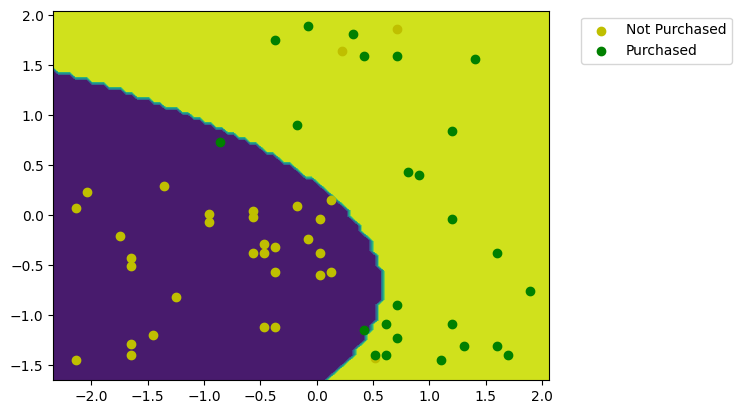

In [73]:

nb = GaussianNB() # default kernel rdf
adamodel = AdaBoostClassifier(estimator=nb,n_estimators=1)
# n_estimators=1 getting 1 weak learners (decision trees)
adamodel.fit(xtrain,ytrain).score(xtest,ytest)

yhat = adamodel.predict(xtest)
print(classification_report(ytest,yhat))


age = np.arange(np.min(xtest[:,0])-0.2, np.max(xtest[:,0])+0.2, 0.05)
salary = np.arange(np.min(xtest[:,1])-0.2, np.max(xtest[:,1])+0.2, 0.05)

# here -0.2 and +0.2 is just for padding so our plot's curves do not touch the axes.

AGE,SAL = np.meshgrid(age,salary)
print(AGE.shape, SAL.shape)

# In X rows values' are same
# In Y column values' are same

feature1 = AGE.ravel()
feature2 = SAL.ravel()

test_vals = np.c_[feature1,feature2]
test_vals.shape

# concatenate as per model's need and reshape to 2D shape so that contour can be plot
# get predicted answers
pred_ans = adamodel.predict(test_vals).reshape(AGE.shape)
pred_ans.shape

plt.contourf(AGE,SAL,pred_ans)

plt.scatter(xtest[ytest==0,0],xtest[ytest==0,1], c='y',label='Not Purchased')
plt.scatter(xtest[ytest==1,0],xtest[ytest==1,1], c='g',label='Purchased')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)

In [74]:
# Best thing we can do here is decision tree with max_depth 1,
# others will work but won't be as good as Decision tree